In [1]:
import numpy as np

In [2]:
from sklearn.datasets import make_blobs

In [3]:
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
X , y = make_blobs(centers=3, random_state=42)

In [5]:
import seaborn as sns

<Axes: >

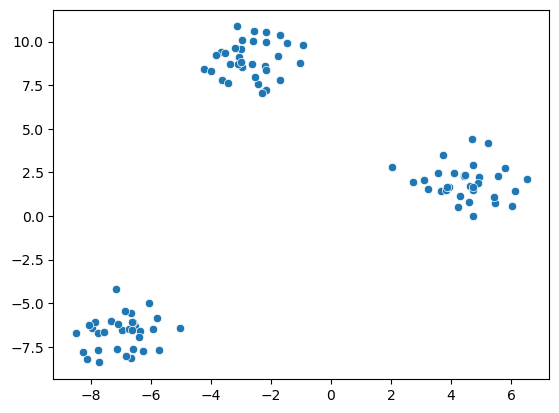

In [6]:
sns.scatterplot(data=X, x=X[:,0], y=X[:,1])

In [7]:
from sklearn.cluster import KMeans

In [8]:
model = KMeans(n_clusters=4,n_init=10)

import os

os.environ['OMP_NUM_THREADS'] = '1'


In [9]:
model.fit(X)

C:\Users\Ellertone\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4, n_init=10)

In [10]:
y_gen = model.labels_

<Axes: >

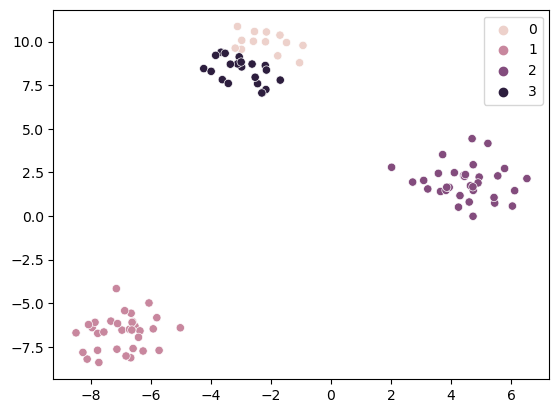

In [11]:
sns.scatterplot(x=X[:,0], y=X[:,1], hue=y_gen)

In [12]:
model.cluster_centers_

array([[-2.20127958,  9.94858935],
       [-6.95170962, -6.67621669],
       [ 4.49951001,  1.93892013],
       [-2.95660471,  8.30877152]])

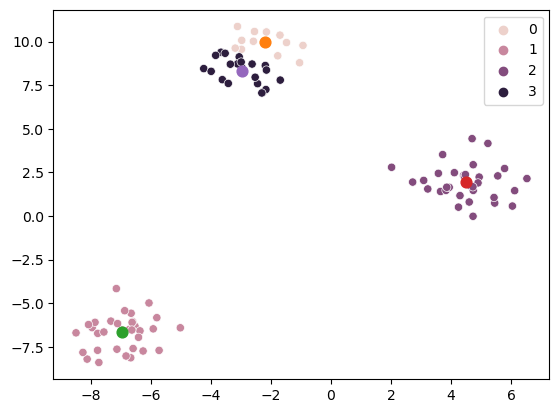

In [13]:
sns.scatterplot(x=X[:,0], y=X[:,1], hue=y_gen)

for center in model.cluster_centers_:
    plt.scatter(center[0], center[1], s=60)

In [14]:
import random

In [45]:
class Cluster:
    
    def __init__(self, center):
        self.center = center
        self.points =[]
    def distance(self, point):
        
        return np.sqrt(np.sum ((point - self.center) ** 2))
        

class CustomKMeans:
    
    def __init__(self, n_clusters=3, max_iters=20):
        self.n_clusters = n_clusters
        self.max_iters = max_iters
        
    def fit(self,X):
        
        clusters =[]
        for i in range(self.n_clusters): 
            cluster = Cluster(center=random.choice(X))
            clusters.append(cluster)
            
            
            
            for i in range(self.max_iters):
                
                labels= []
                # going for each point
                for point in X:

                    # collecting distances from every cluster
                    distances = []
                    for cluster in clusters:
                        distances.append(cluster.distance(point))

                    # finding closest cluster     
                    closest_idx = np.argmin(distances)
                    closest_cluster = clusters[closest_idx]
                    closest_cluster.points.append(point)
                    labels.append(closest_idx)

            for cluster in clusters:
                cluster.center = np.mean(cluster.points, axis=0)
            
        self.labels = labels
        self.cluster_centers_ = [cluster.center for cluster in clusters]
        

In [46]:
model = CustomKMeans(n_clusters=4)

model.fit(X)

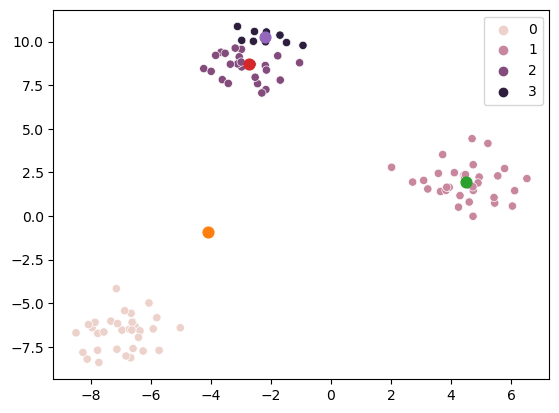

In [47]:
sns.scatterplot(x=X[:,0], y=X[:,1] , hue=model.labels)

for center in model.cluster_centers_:
    plt.scatter(center[0], center[1], s=60)